In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [41]:
df = pd.read_csv("resumedata.zip")

In [42]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [43]:
df.shape

(962, 2)

In [44]:
df["Category"]

0      Data Science
1      Data Science
2      Data Science
3      Data Science
4      Data Science
           ...     
957         Testing
958         Testing
959         Testing
960         Testing
961         Testing
Name: Category, Length: 962, dtype: object

In [45]:
df["Category"].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Mechanical Engineer          40
ETL Developer                40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: count, dtype: int64

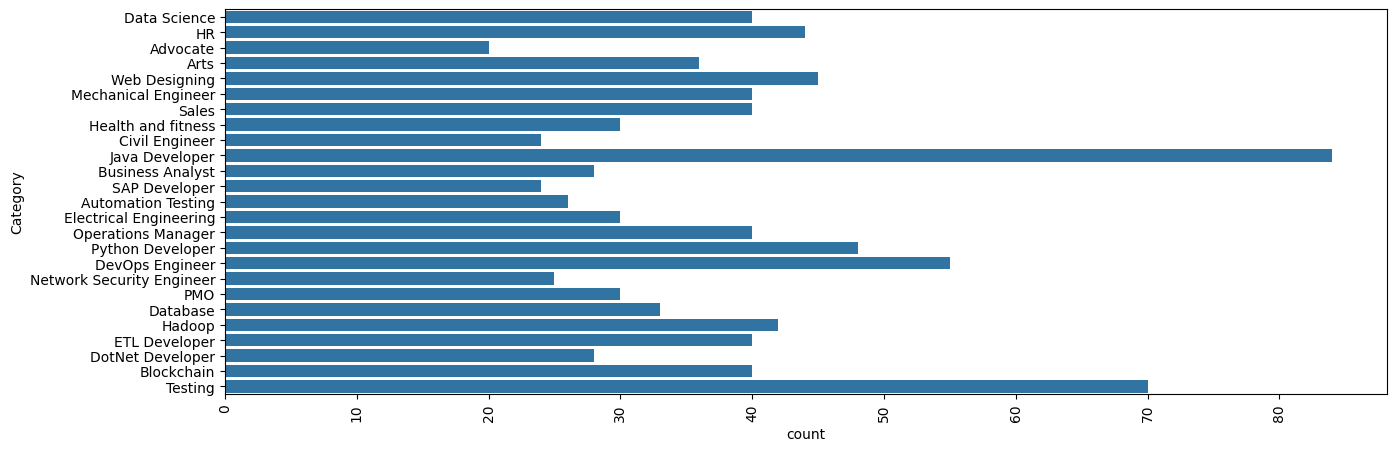

In [46]:
plt.figure(figsize=(15,5))
sns.countplot(df["Category"])
plt.xticks(rotation=90)
plt.show()

In [47]:
df["Category"].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [48]:
df.Category.unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

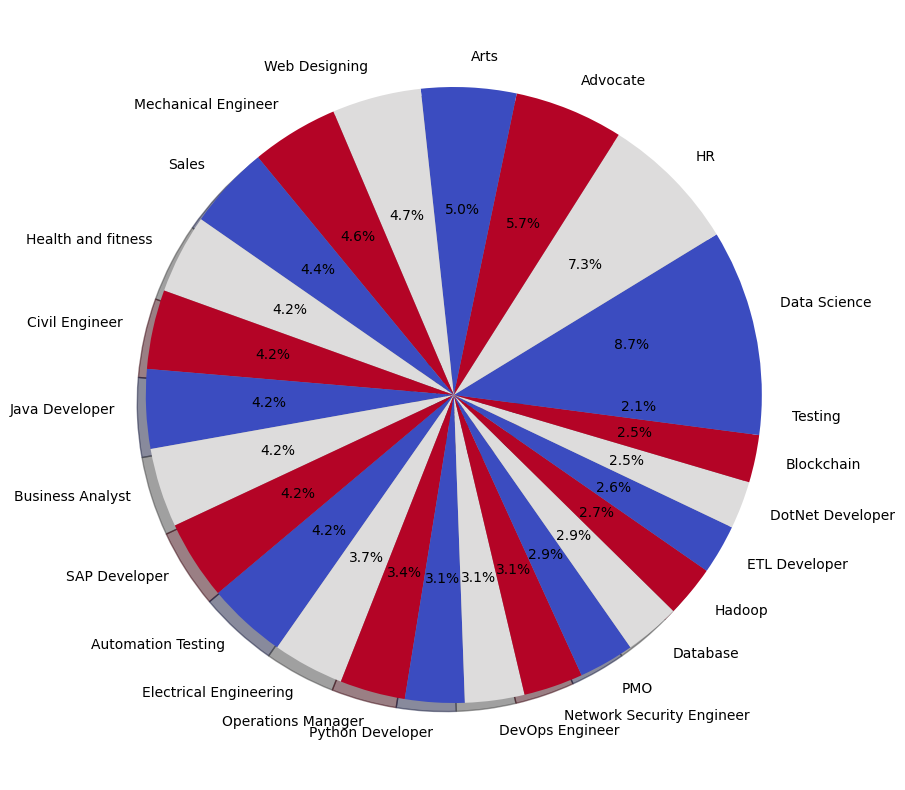

In [49]:
counts = df["Category"].value_counts()
labels = df["Category"].unique()
plt.figure(figsize=(15,10))
plt.pie(counts,labels=labels,autopct="%1.1f%%",shadow=True, colors=plt.cm.coolwarm(np.linspace(0,1,3)))
plt.show()

In [50]:
# EXPLORING THE RESUME
df['Category'][0]

'Data Science'

In [51]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [52]:
# Check the original category distribution
print("Original Category Distribution:")
print(df['Category'].value_counts())

# Get the largest category size (i.e., the category with the maximum number of entries)
max_size = df['Category'].value_counts().max()

# Perform oversampling
balanced_df = df.groupby('Category').apply(lambda x: x.sample(max_size, replace=True)).reset_index(drop=True)

# Shuffle the dataset to avoid any order bias
df = balanced_df.sample(frac=1).reset_index(drop=True)

# Check the balanced category distribution
print("\nBalanced Category Distribution (After Oversampling):")
print(df['Category'].value_counts())

Original Category Distribution:
Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Mechanical Engineer          40
ETL Developer                40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: count, dtype: int64

Balanced Category Distribution (After Oversampling):
Category
Python Developer             84
Database                     84
SAP De

C:\Users\Asus\AppData\Local\Temp\ipykernel_19692\1665345931.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_df = df.groupby('Category').apply(lambda x: x.sample(max_size, replace=True)).reset_index(drop=True)


In [53]:
#CLEANING THE DATA
#URLS , HASTAGS , MAENTIONS ,ETC

In [54]:
import re
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText)
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText

<>:3: SyntaxWarning: invalid escape sequence '\S'
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:7: SyntaxWarning: invalid escape sequence '\]'
<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\S'
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:7: SyntaxWarning: invalid escape sequence '\]'
<>:9: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Asus\AppData\Local\Temp\ipykernel_19692\603351012.py:3: SyntaxWarning: invalid escape sequence '\S'
  cleanText = re.sub('http\S+\s', ' ', txt)
C:\Users\Asus\AppData\Local\Temp\ipykernel_19692\603351012.py:5: SyntaxWarning: invalid escape sequence '\S'
  cleanText = re.sub('#\S+\s', ' ', cleanText)
C:\Users\Asus\AppData\Local\Temp\ipykernel_19692\603351012.py:6: SyntaxWarning: invalid escape sequence '\S'
  cleanText = re.sub('@\S+', '  ', cleanText)
C:\Users\Asus\AppData\Local\Temp\ipy

In [55]:
cleanResume("my #### $ #  #rineetroy webiste like is this http://heloword and access it @gmain.com")

'my webiste like is this and a ess it '

In [56]:
df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))

In [57]:
df['Resume'][0]

'Technical Skills Languages Python Python Framework Django DRF Databases MySQL Oracle Sqlite MongoDB Web Technologies CSS HTML RESTful Web Services REST Methodologies Agile Scrum Version Control Github Project Managent Tool Jira Operating Systems Window Unix Education Details BE Dr BAMU Aurangabad Python Developer Python Developer Arsys Inovics pvt ltd Skill Details CSS Exprience 31 months DJANGO Exprience 31 months HTML Exprience 31 months MYSQL Exprience 31 months PYTHON Exprience 31 months web services Exprience Less than 1 year months Logger Exprience Less than 1 year months Mongodb Exprience Less than 1 year months json Exprience Less than 1 year months Unix Exprience Less than 1 year months Rest Exprience Less than 1 year months Sqlit3 Exprience Less than 1 year monthsCompany Details company Arsys inovics pvt ltd description Project F MAS Frequency Monitoring and Analysis Systems F MAS F MAS is a project for managing network inventory network communication fault management networ

In [58]:
# CONVERTING WORDS INTO CATEGORICAL VALUES

In [59]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [60]:
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [61]:
df.Category.unique()

array([20,  7, 21, 16, 15, 17, 18, 12,  0, 10,  9,  3, 11, 23,  8, 22,  6,
       19,  1,  2,  5, 13, 14, 24,  4])

In [62]:
df["Category"].unique()

array([20,  7, 21, 16, 15, 17, 18, 12,  0, 10,  9,  3, 11, 23,  8, 22,  6,
       19,  1,  2,  5, 13, 14, 24,  4])

In [63]:
# ['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
#        'Mechanical Engineer', 'Sales', 'Health and fitness',
#        'Civil Engineer', 'Java Developer', 'Business Analyst',
#        'SAP Developer', 'Automation Testing', 'Electrical Engineering',
#        'Operations Manager', 'Python Developer', 'DevOps Engineer',
#        'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
#        'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
#       dtype=object)

In [64]:
# VECTORIZATION
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

tfidf.fit(df['Resume'])
requredTaxt  = tfidf.transform(df['Resume'])

In [65]:
#Splitting

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(requredTaxt, df['Category'], test_size=0.2, random_state=42)

In [68]:
X_train.shape

(1680, 7314)

In [69]:
X_test.shape

(420, 7314)

In [70]:
# training the model and print the classification report:

In [71]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)
print(accuracy_score(y_test, ypred))

0.9976190476190476


In [72]:
ypred

array([22, 10,  7, 23,  0, 23,  4,  1, 20,  5, 11, 23,  7, 17, 23, 15, 13,
       16, 17, 18, 13, 19,  2, 20,  1, 19, 16, 23, 14, 20, 13, 12, 20,  3,
        2,  2, 20, 22,  7, 12,  9,  5,  6, 24,  0, 16, 14,  2, 14, 17, 24,
        1,  9, 19, 15,  6, 13,  4, 17,  2, 18, 16, 17,  5, 11,  3,  4, 12,
       15, 16, 10,  1, 10,  9,  9, 19, 15, 21, 16, 15, 13, 12, 20,  9,  5,
       10,  7,  1, 15,  1, 13, 15,  4,  0, 22, 22, 13, 16, 24,  3, 20, 20,
       20, 23, 14,  0, 22,  3,  2,  5,  6,  9,  5,  8,  1, 17,  1, 23,  5,
        6,  9,  3, 11,  7,  1,  6, 11, 14, 11,  9,  8, 16, 21, 23, 23,  1,
       21, 18,  7, 22, 17, 13,  5, 16, 17,  7, 12,  3, 24, 13,  7, 18,  5,
       18,  0, 21, 11,  3,  5, 23, 14,  2, 19,  8,  0, 21,  9,  9, 23, 18,
       12, 10, 24,  3, 12,  7, 18, 22,  0,  8, 12, 11, 10, 22,  1, 15, 19,
        5,  2, 19, 21, 14,  6, 11,  4,  9, 22, 17, 12, 24, 16, 14, 14,  1,
       10, 10, 23,  4,  8,  8, 14, 23, 15,  3,  8, 14, 11,  3,  4, 23, 23,
       23,  2, 15,  1, 11

In [73]:
#Save Files

In [74]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(clf,open('clf.pkl','wb'))

In [75]:
myresume = """I am a data scientist specializing in machine
learning, deep learning, and computer vision. With
a strong background in mathematics, statistics,
and programming, I am passionate about
uncovering hidden patterns and insights in data.
I have extensive experience in developing
predictive models, implementing deep learning
algorithms, and designing computer vision
systems. My technical skills include proficiency in
Python, Sklearn, TensorFlow, and PyTorch.
What sets me apart is my ability to effectively
communicate complex concepts to diverse
audiences. I excel in translating technical insights
into actionable recommendations that drive
informed decision-making.
If you're looking for a dedicated and versatile data
scientist to collaborate on impactful projects, I am
eager to contribute my expertise. Let's harness the
power of data together to unlock new possibilities
and shape a better future.
Contact & Sources
Email: 611noorsaeed@gmail.com
Phone: 03442826192
Github: https://github.com/611noorsaeed
Linkdin: https://www.linkedin.com/in/noor-saeed654a23263/
Blogs: https://medium.com/@611noorsaeed
Youtube: Artificial Intelligence
ABOUT ME
WORK EXPERIENCE
SKILLES
NOOR SAEED
LANGUAGES
English
Urdu
Hindi
I am a versatile data scientist with expertise in a wide
range of projects, including machine learning,
recommendation systems, deep learning, and computer
vision. Throughout my career, I have successfully
developed and deployed various machine learning models
to solve complex problems and drive data-driven
decision-making
Machine Learnine
Deep Learning
Computer Vision
Recommendation Systems
Data Visualization
Programming Languages (Python, SQL)
Data Preprocessing and Feature Engineering
Model Evaluation and Deployment
Statistical Analysis
Communication and Collaboration
"""


In [76]:
import pickle
clf = pickle.load(open('clf.pkl','rb'))

cleaned_resume = cleanResume(myresume)
input_features = tfidf.transform([cleaned_resume])
prediction_id = clf.predict(input_features)[0]

category_mapping = {
    6:'Data Science',
    12:'HR',
    0:'Avocate',
    1:'Arts',
    24:'Web Designing',
    16:'Mechanincal Engineer',
    22:'Sales',
    8:'Health and fitness',
    5:'Civil Engineer',
    15:'Java Developer',
    4:'Business Analyst',
    21:'SAP Developer',
    2:'Automation Testing',
    20:'Electrical Engineering',
    18:'Operations Manager',
    20:'Python Developer',
    8:'DevOps Engineer',
    17:'Network Security Engineer',
    19:'PMO',
    7:'Database',
    13:'Handoop',
    10:'ELT Developer',
    9:'DotNet Developer',
    3:'Blockchain',
    23:'Testing',

}
category_name = category_mapping.get(prediction_id,"unknown")
print("Prediction_category:", category_name)
print('id:',prediction_id)






















Prediction_category: Data Science
id: 6
